In [97]:
import matplotlib.pyplot as plt
from pathlib import Path
import os
import numpy as np
import pickle
from collections import defaultdict

#### Compare performance across experiments

In [130]:
def get_losses(exp_name, folder_name, BASE_DIR):
    EXP_PATH = os.path.join(BASE_DIR, folder_name, exp_name) #experiments_1
    loss_dict = pickle.load(open(os.path.join(EXP_PATH, 'loss.pkl'), 'rb'))
    losses = [v for k,v in loss_dict.items()]
    losses = sum(losses, [])
#     losses = [sum(l)/len(l) for l in losses]
    return losses

In [172]:
def plot_loss_multiple(exp_list, folder_name, BASE_DIR = None, save_name = 'exp_plot'):
    if BASE_DIR is None:
        BASE_DIR = Path(os.getcwd())
    # Training loss
    fig = plt.figure(figsize=(8,5))
    plt.xlabel('iterations', fontsize=14)
    plt.ylabel('loss', fontsize=14)
#     plt.yticks(np.arange(0, 1, 0.05))
    plt.grid(linestyle='--')
    for exp_name in exp_list:
        losses = get_losses(exp_name, folder_name, BASE_DIR)
        plt.plot([x for x in range(0,len(losses))], losses, label = exp_name)
    plt.legend()
    plt.show()
    fig.savefig(os.path.join('plots', save_name + '.png'))

In [153]:
def plot_val_multiple(exp_list, folder_name, BASE_DIR = None, save_name = 'exp_plot'):
    if BASE_DIR is None:
        BASE_DIR = Path(os.getcwd())
    # Validation metrics
    f, ax = plt.subplots(2,2,figsize = (12,12))
    ax = ax.flatten()
    eval_every = 2

    for exp_name in exp_list:
        EXP_PATH = os.path.join(BASE_DIR, folder_name, exp_name) #experiments_1
        eval_dict = pickle.load(open(os.path.join(EXP_PATH, 'eval.pkl'), 'rb'))
        metrics = defaultdict(list)
        for k,v in eval_dict.items():
            for key,val in v.items():
                metrics[key].append(sum(val)/len(val))

        for i, k in enumerate(metrics.keys()):
            ax[i].plot([x for x in range(0,len(metrics[k])*eval_every,eval_every)], metrics[k], label = exp_name)
            ax[i].set_xlabel('epochs', fontsize=14)
            ax[i].set_ylabel(k, fontsize=14)
            ax[i].grid(linestyle='--')
            ax[i].legend()
    plt.show()
    f.savefig(os.path.join('plots', save_name + '.png'))

#### Model 1 with different pooling (higher res spectrogram)

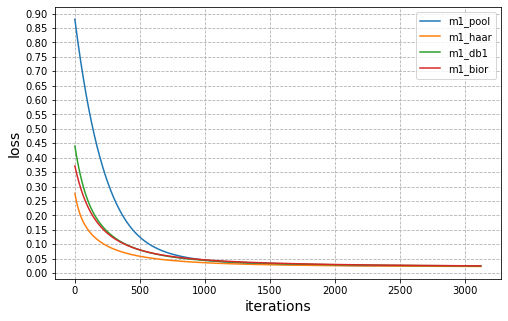

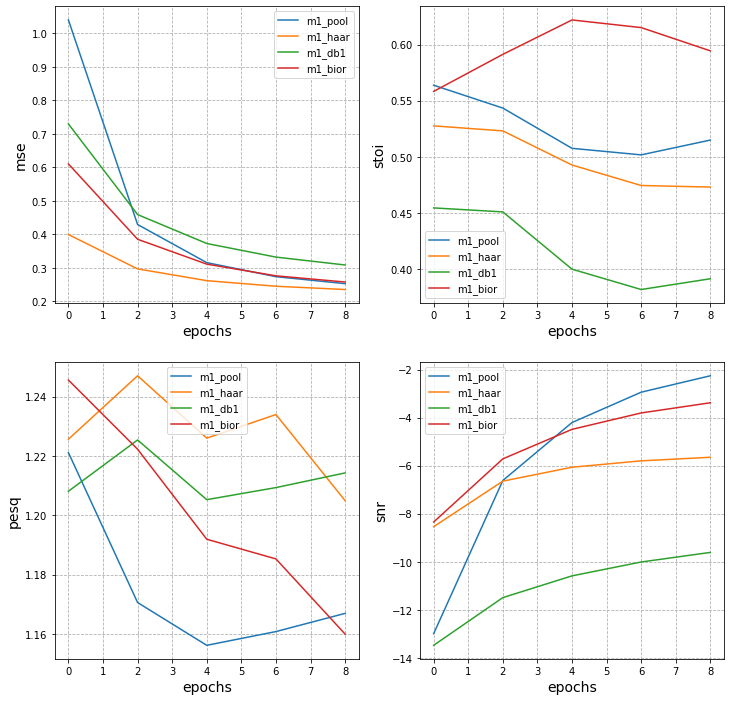

In [154]:
exp_list = ['m1_pool', 'm1_haar' ,'m1_db1','m1_bior']
plot_loss_multiple(exp_list, 'experiments', save_name = 'm1_loss')
plot_val_multiple(exp_list, 'experiments', save_name = 'm1_eval')

#### Model 2 with different pooling (higher res spectrogram)

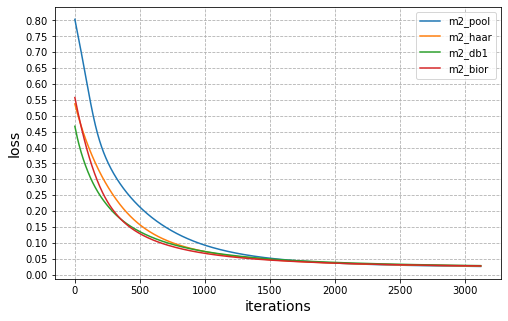

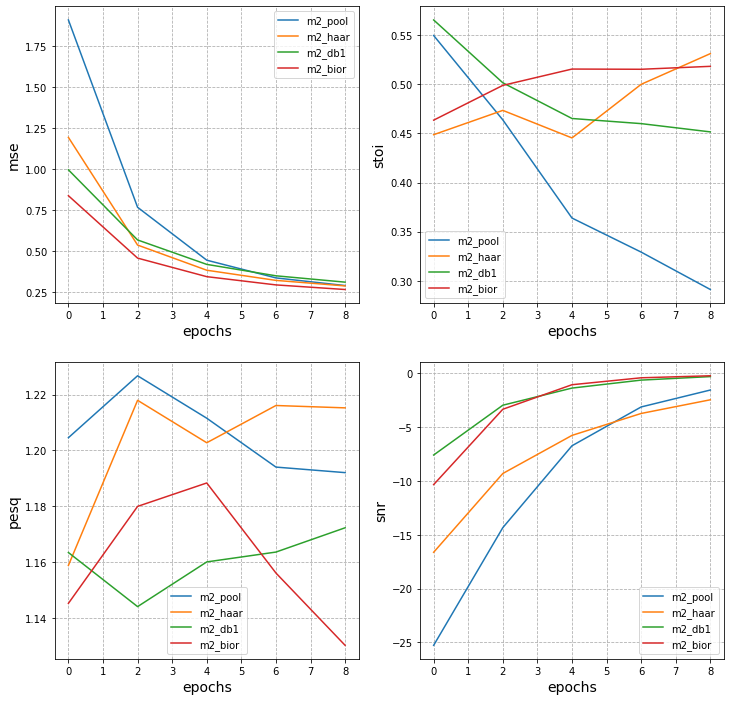

In [155]:
exp_list = ['m2_pool' ,'m2_haar' ,'m2_db1' ,'m2_bior']
plot_loss_multiple(exp_list, "experiments", save_name = 'm2_loss')
plot_val_multiple(exp_list, "experiments", save_name = 'm2_eval')

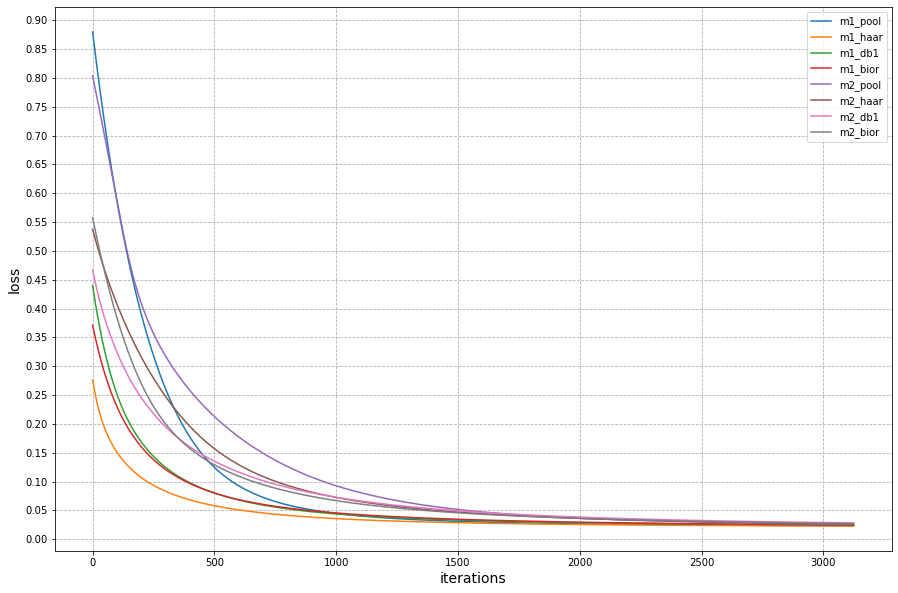

In [107]:
exp_list = ['m1_pool', 'm1_haar' ,'m1_db1','m1_bior','m2_pool' ,'m2_haar' ,'m2_db1' ,'m2_bior']
plot_loss_multiple(exp_list, 'experiments')

#### Model 2 with different pooling (lower res spectrogram)

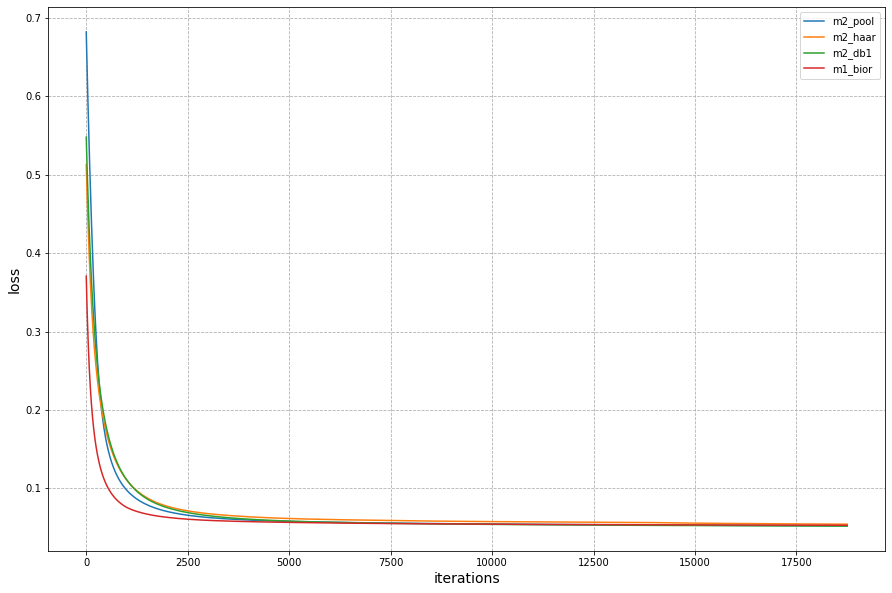

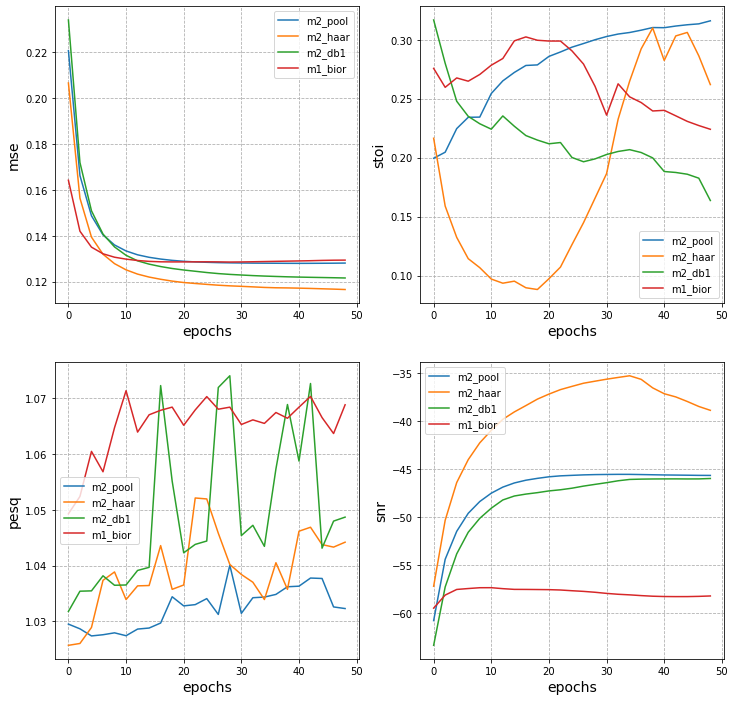

In [82]:
exp_list = ['m2_pool', 'm2_haar', 'm2_db1', 'm1_bior']
plot_loss_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')
plot_val_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')

#### Model 1 with different pooling (lowe res spectrogram)

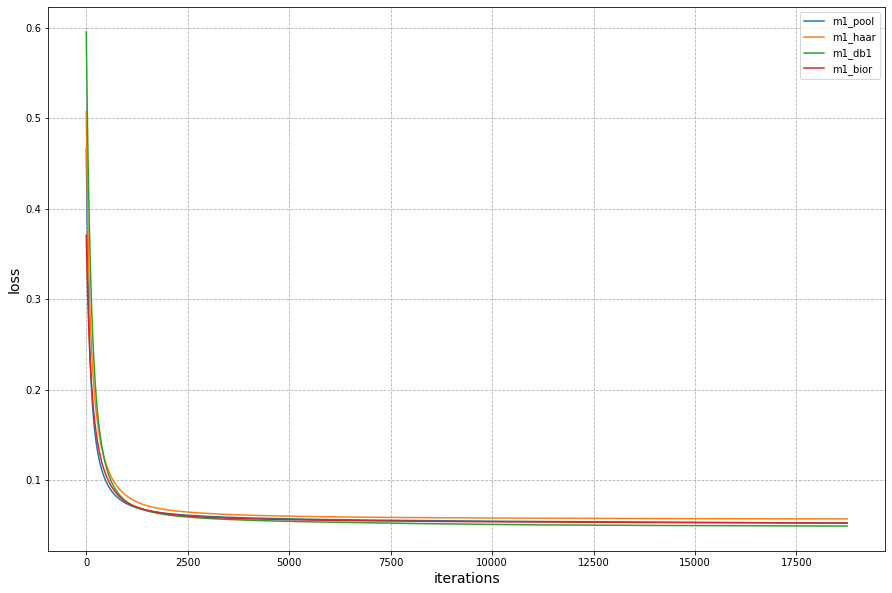

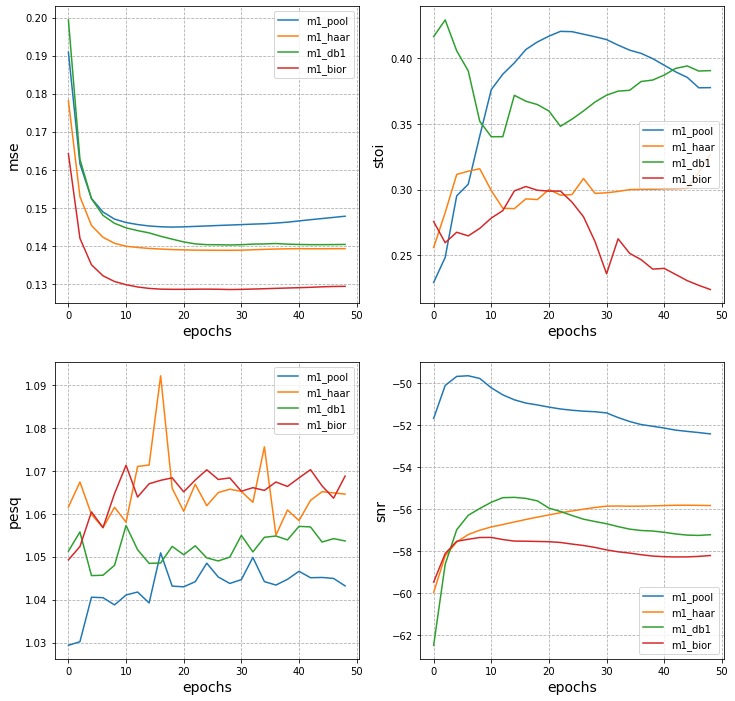

In [83]:
exp_list = ['m1_pool', 'm1_haar', 'm1_db1', 'm1_bior']
plot_loss_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')
plot_val_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')

#### Comparing across models with differnet pooling techniques
Low res, 50 epochs train, sgd, eval evry 5

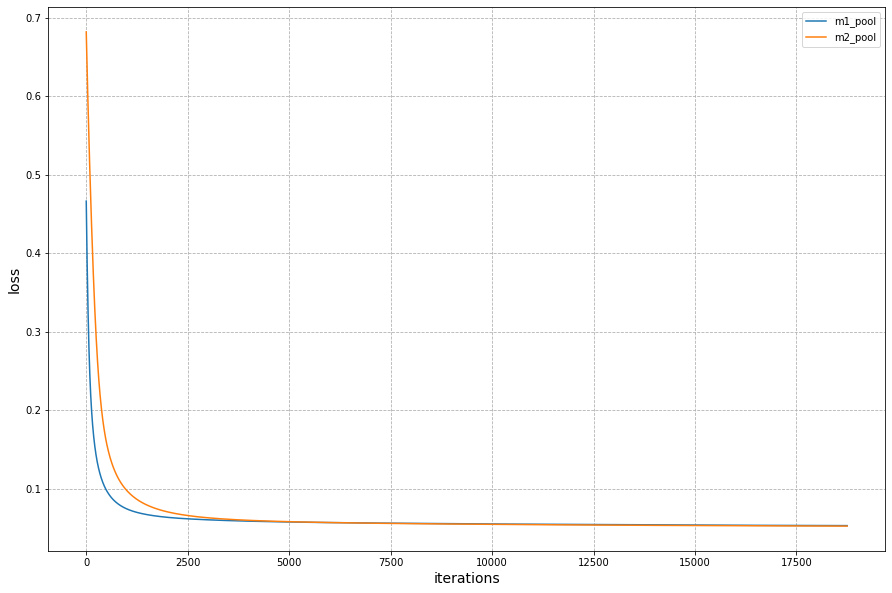

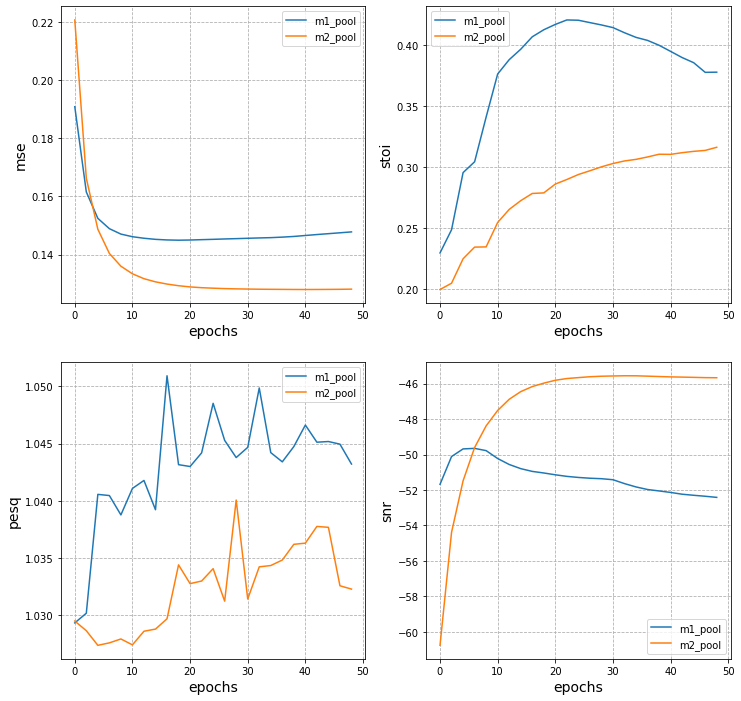

In [84]:
exp_list = ['m1_pool', 'm2_pool']
plot_loss_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')
plot_val_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')

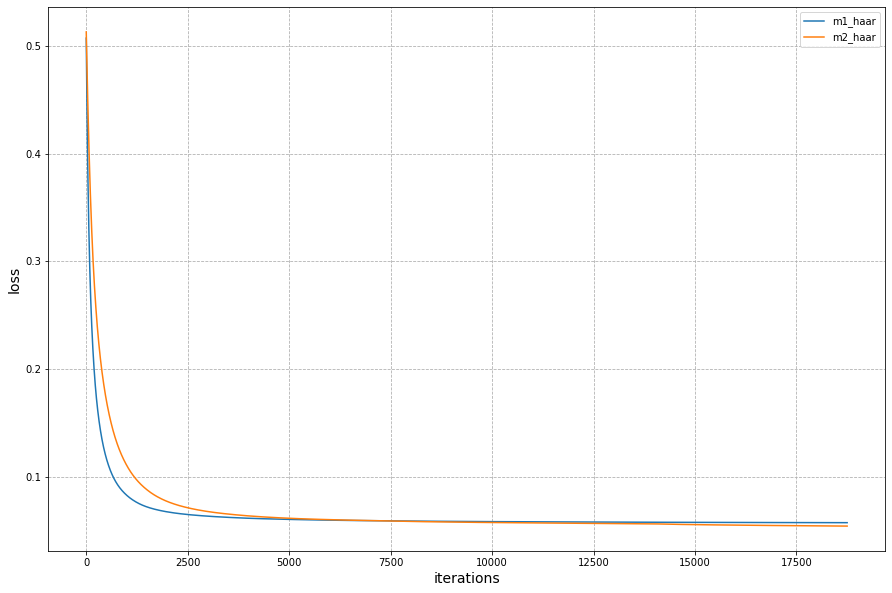

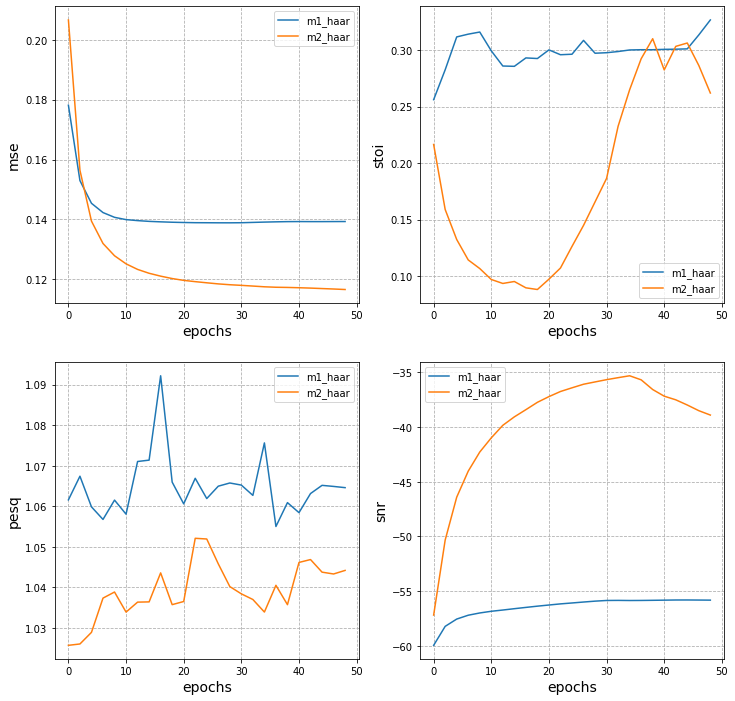

In [85]:
exp_list = ['m1_haar', 'm2_haar']
plot_loss_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')
plot_val_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')

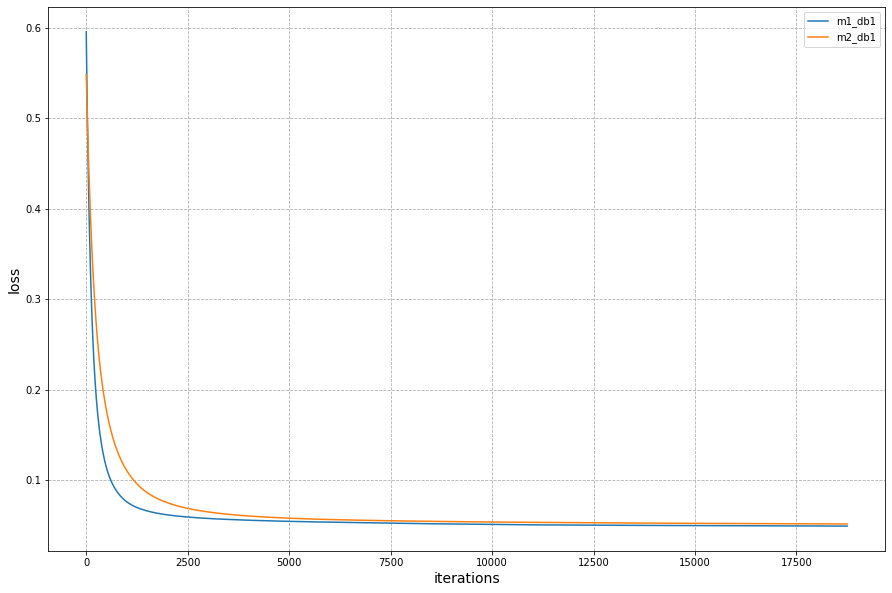

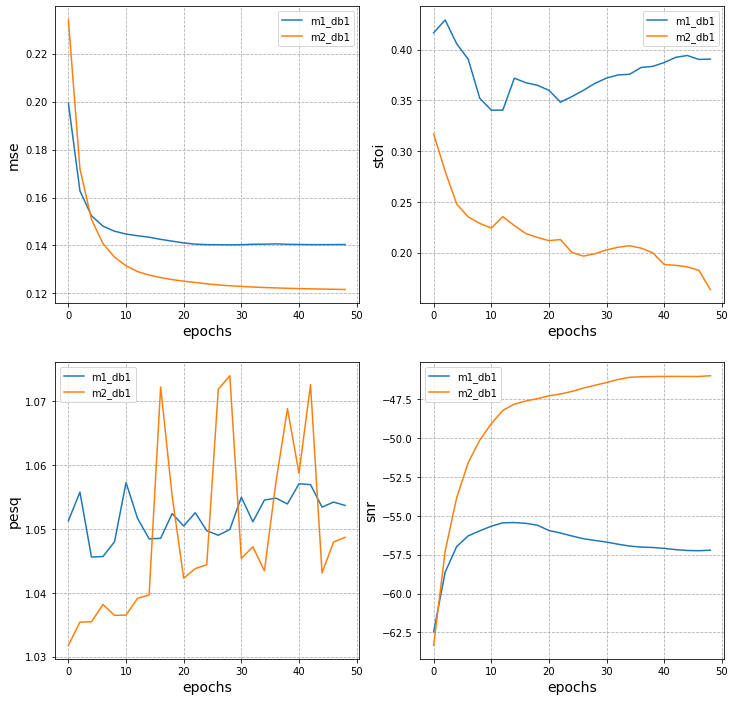

In [86]:
exp_list = ['m1_db1', 'm2_db1']
plot_loss_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')
plot_val_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')

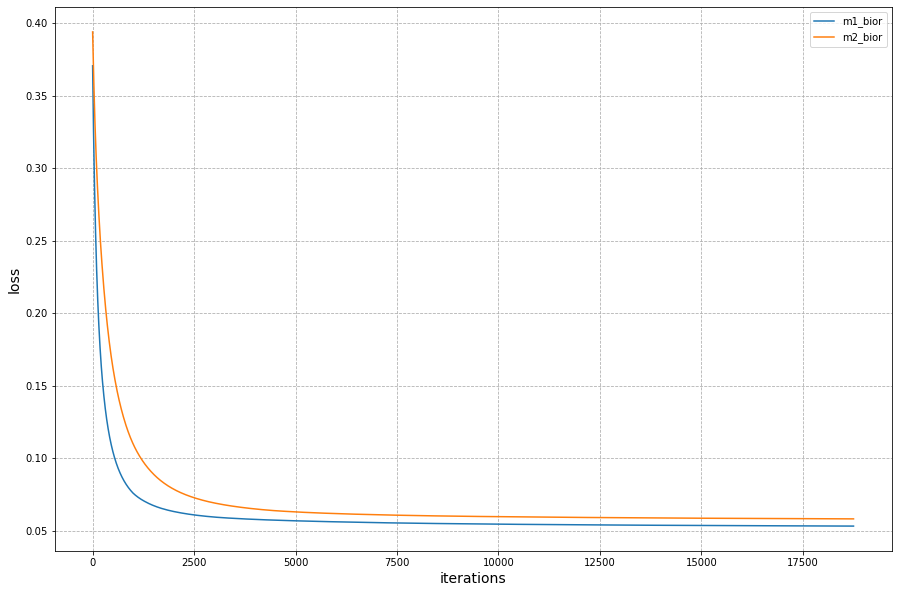

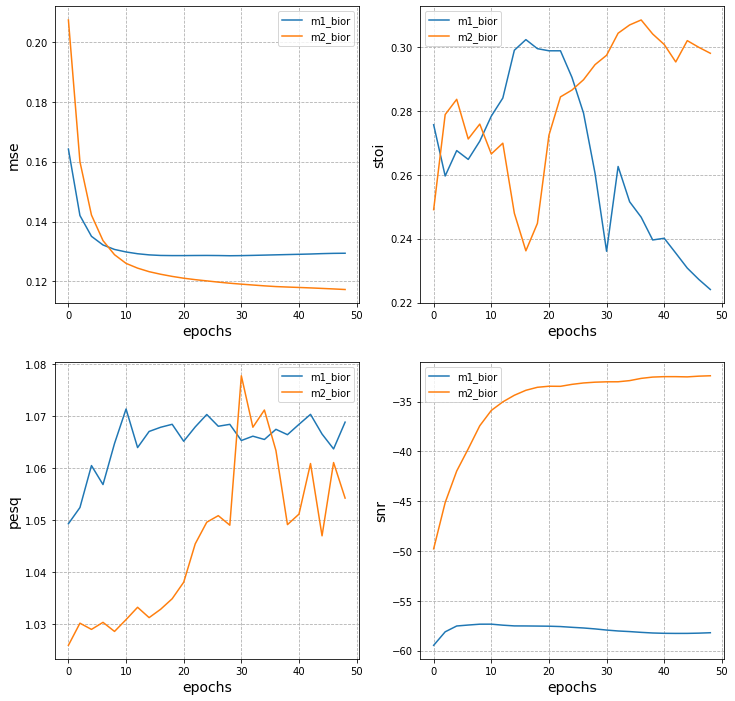

In [88]:
exp_list = ['m1_bior', 'm2_bior']
plot_loss_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')
plot_val_multiple(exp_list, "experiments_1", BASE_DIR = '/home/pakumar/private/251C_Project/')

#### Exp with normalized data

In [178]:
data_stats = pickle.load(open('data/pkl_files/train_data/data_stats_1000.pickle', 'rb'))
data_stats

{'snr': 0.6353477844489676, 'stoi': 0.6210652933729113}

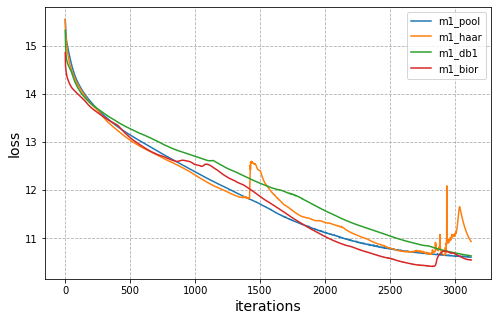

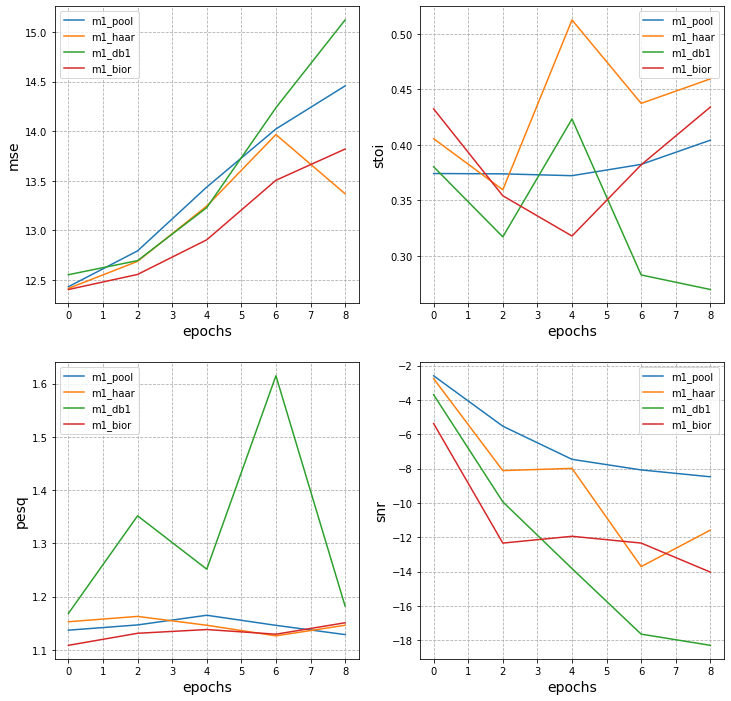

In [173]:
exp_list = ['m1_pool', 'm1_haar', 'm1_db1', 'm1_bior']
plot_loss_multiple(exp_list, "experiments")
plot_val_multiple(exp_list, "experiments")

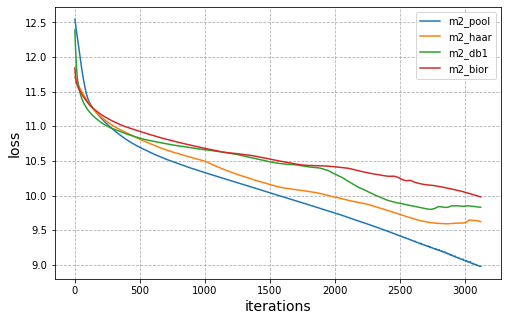

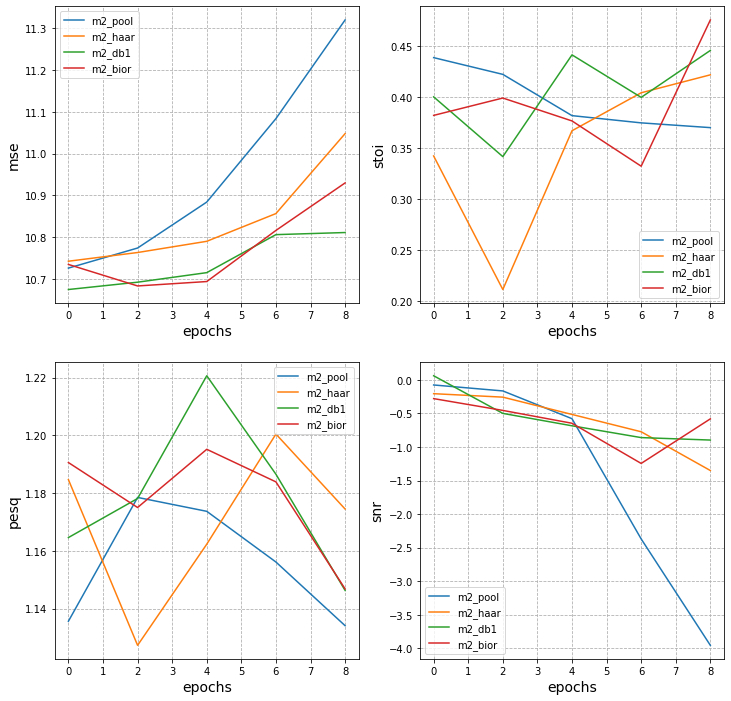

In [174]:
exp_list = ['m2_pool', 'm2_haar', 'm2_db1', 'm2_bior']
plot_loss_multiple(exp_list, "experiments")
plot_val_multiple(exp_list, "experiments")

#### Old formula for M1

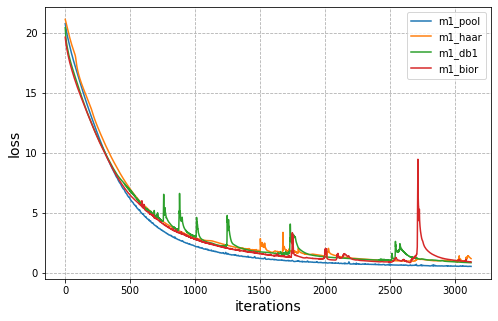

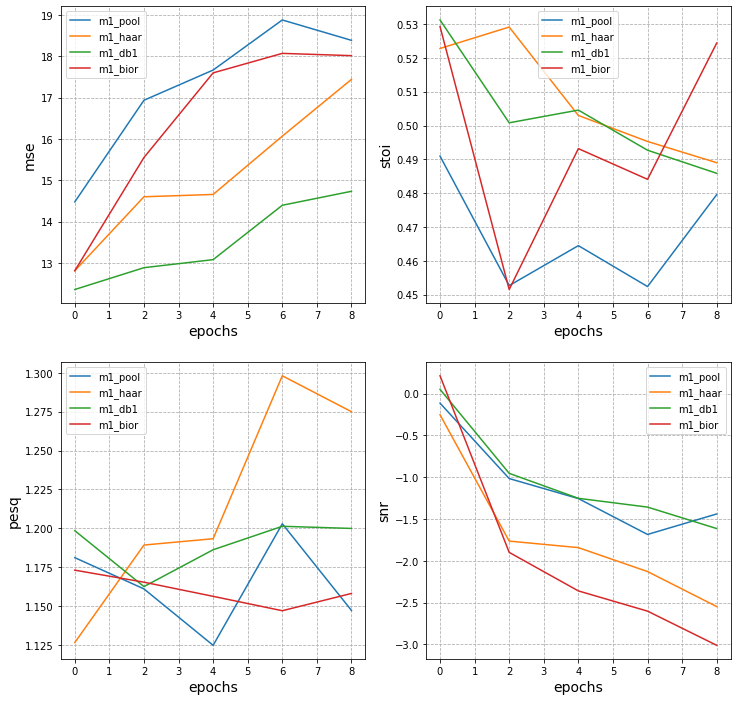

In [184]:
exp_list = ['m1_pool', 'm1_haar', 'm1_db1', 'm1_bior']
plot_loss_multiple(exp_list, "experiments")
plot_val_multiple(exp_list, "experiments")

#### Plot experiment specific curves

In [179]:
exp_name = 'local_exp'
BASE_DIR = Path(os.getcwd())
EXP_PATH = os.path.join(BASE_DIR, 'experiments', exp_name)

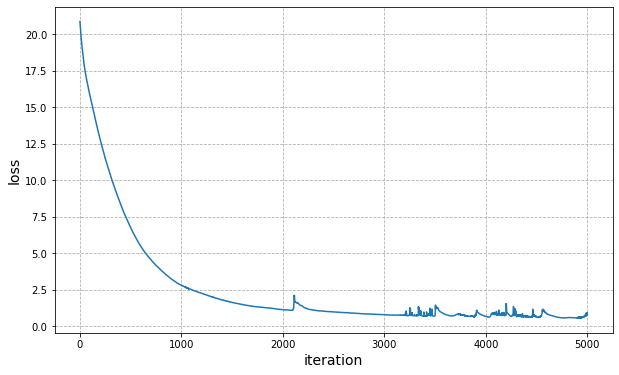

In [180]:
loss_dict = pickle.load(open(os.path.join(EXP_PATH, 'loss.pkl'), 'rb'))
losses = [v for k,v in loss_dict.items()]
losses = sum(losses, [])
fig = plt.figure(figsize=(10,6))
plt.plot([x for x in range(0,len(losses))], losses)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.grid(linestyle='--')
plt.show()

In [181]:
eval_dict = pickle.load(open(os.path.join(EXP_PATH, 'eval.pkl'), 'rb'))

In [182]:
metrics = defaultdict(list)
for k,v in eval_dict.items():
    for key,val in v.items():
        metrics[key].append(sum(val)/len(val))

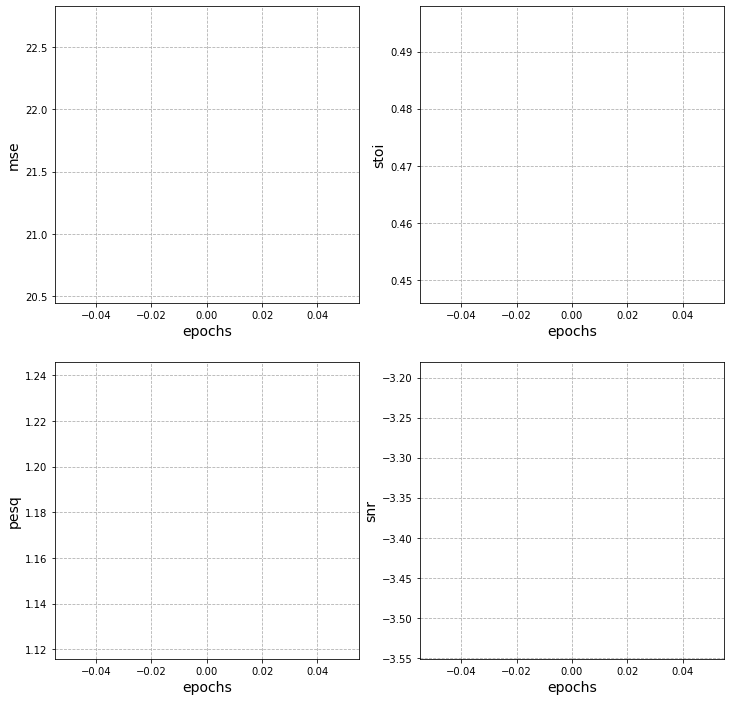

In [183]:
f, ax = plt.subplots(2,2,figsize = (12,12))
ax = ax.flatten()
eval_every = 2
for i, k in enumerate(metrics.keys()):
    ax[i].plot([x for x in range(0,len(metrics[k])*eval_every,eval_every)], metrics[k])
    ax[i].set_xlabel('epochs', fontsize=14)
    ax[i].set_ylabel(k, fontsize=14)
    ax[i].grid(linestyle='--')
plt.show()